# Gun Control and Crime

## Introduction

Gun control and gun violance is a hot topic in american politics. Often you will here loud and emotional arguments on TV about assault rile bans and similiar issues. While people aligning with the democartic party usually assume that more gun ownership will lead to more murders, conservatives usually cite the slogan "only a good guy with a gun will stop a bad guy with a gun". In my final tutorial I will analize crime data from the year 2013 to try and determine if the rate of gun ownership in a state is correlated to the murder rate.

In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import scipy.stats

## The Data

Multiple data sources had to be combined to reach the final conclusions.

Crime data from the FBI's uniform crime reports are used for data on the amount of murders and nonnegligent manslaughters (https://www.ucrdatatool.gov/Search/Crime/Crime.cfm). Since we need the amount of murders per capita instead of just total number, also population data by state is needed. This data comes from the US Census Bureau's 2017 estimate of the 2013 US population by state (https://www.census.gov/data/tables/2017/demo/popest/nation-total.html). The gun ownership data is from a study conducted by Bindu Kalesan, et al (https://injuryprevention.bmj.com/content/injuryprev/early/2015/06/09/injuryprev-2015-041586.full.pdf?keytype=ref&ijkey=doj6vx0laFZMsQ2). The sample in the study were 4000 US adults.

### Crime Data

In [2]:
f = open("./crime_data.csv")
lines = f.readlines()
f.close()

In [3]:
states_lst= lines[4].split(",")[1:]
states = []
murders = []
years = []

for line in lines[5:60]:
    if line == "\n":
        continue
    line_split = line.split(",")
    
    year = int(line_split[0])
    
    if not year == 2013:
        continue
    
    for i, a in enumerate(line_split[1:]):
        years.append(year)
        states.append(states_lst[i])
        
        if a == "" or a == "\n":
            murders.append(float("nan"))
        else:
            murders.append(float(a))
    
    ###########

### Census Data

In [4]:
f = open("./population_data.csv")
lines = f.readlines()
f.close()

In [5]:
years_pop_lst = [int(float(x)) for x in lines[0].split(",")[4:-6]]
population = []
states_pop = []
years_pop = []

for i, line in enumerate(lines[1:]):
    state = states_lst[i]
    for j, a in enumerate(line.split(",")[4:-6]):
        years_pop.append(years_pop_lst[j])
        states_pop.append(states_lst[i])
        population.append(int(float(a)))

### Gun Ownership Data

In [6]:
gun_ownership = [48.9, 61.7, 32.3, 57.9, 20.1, 34.3, 16.6, 5.2, 25.9, 32.5, 31.6, 45.1, 56.9, 26.2, 33.8, 33.8, 32.2, 42.4, 44.5, 22.6, 20.7, 22.6, 28.8, 36.7, 42.8, 27.1, 52.3, 19.8, 37.5, 14.4, 11.3, 49.9, 10.3, 28.7, 47.9, 19.6, 31.2, 26.6, 27.1, 5.8, 44.4, 35.0, 39.4, 35.7, 31.9, 28.8, 29.3, 27.7, 54.2, 34.7, 53.8, 29.1]

### Pandas DataFrame

In [7]:
data = pd.DataFrame(data={"year": years, "state": states, "population": population, "murders": murders, "gun_ownership": gun_ownership})

In [8]:
data.head()

,gun_ownership,murders,population,state,year
0,48.9,346.0,4827660,Alabama,2013
1,61.7,34.0,736760,Alaska,2013
2,32.3,355.0,6616124,Arizona,2013
3,57.9,158.0,2956780,Arkansas,2013
4,20.1,1746.0,38347383,California,2013


The murder rate per 100,000 can be calculated by:
\begin{equation}
\text{murder rate} = \frac {\text{#murders} \times 100,000}{population}
\end{equation}

In [9]:
data["murder_rate"] = data["murders"] / data["population"] * 100000

In [10]:
data.head()

,gun_ownership,murders,population,state,year,murder_rate
0,48.9,346.0,4827660,Alabama,2013,7.167033
1,61.7,34.0,736760,Alaska,2013,4.614800
2,32.3,355.0,6616124,Arizona,2013,5.365679
3,57.9,158.0,2956780,Arkansas,2013,5.343651
4,20.1,1746.0,38347383,California,2013,4.553114


# Analysis

## Exploratory

To just look at the data, I am plotting the murder rate against the gun ownership rate.

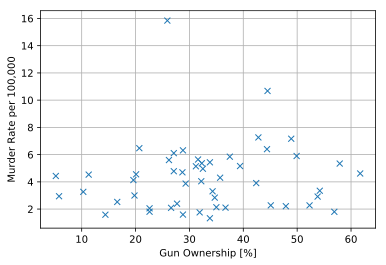

In [11]:
x = data["gun_ownership"][:-1]
y = data["murder_rate"][:-1]

plt.plot(x, y, "x")

plt.xlabel("Gun Ownership [%]")
plt.ylabel("Murder Rate per 100,000")

plt.grid()
plt.show()

Looking at the above figure, there does not immediatly appear to be a correlation. It is also interesting to note some outliers. Firstly, the District of Columbia has a murder rate of almost 16. It does not however have a particularly high amount of gun owners. It is propably related to the fact that if in contrast to the other states (yes I know DC is not a state) is just an urban area. Another interesting state is Idaho with a murder rate of only 1.8 but a gun ownership rate of 56.9 %.

## Is gun ownership correlated to murder rate?

Is there a realtion between gun ownership and murder rate? In this section I will try to find an answer to that question. First by just performing a linear regression, than using hypothesis testing.

### Linear Regression

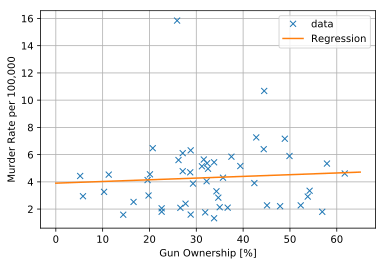

In [13]:
regression = np.poly1d(np.polyfit(x, y, 1))

plt.plot(x, y, "x", label="data")
x_ = np.linspace(0, 65, 2)
plt.plot(x_, regression(x_), label="Regression")

plt.xlabel("Gun Ownership [%]")
plt.ylabel("Murder Rate per 100,000")

plt.grid()
plt.legend()
plt.show()

As can be seen above, the linear regression line does have a positive slope, although it appears to be small compared to the overall variation in murder rate.

### Hypothesis Testing

To finally answer the question, I will assume that the null hypothesis is no relation (slope=0) between the two variables

Scipy's linear regression will give all needed information:

In [14]:
scipy.stats.linregress(x, y)

LinregressResult(slope=0.012489883846117102, intercept=3.904170616296212, rvalue=0.066972803365926578, pvalue=0.64053623100372714, stderr=0.026581880894526323)